In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from regressors import stats
from scipy.stats import kurtosis, skew, boxcox
from sklearn.kernel_ridge import KernelRidge

In [4]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

# Missing Values

In [5]:
na_counts_train = train.isnull().sum()
na_counts_train = na_counts_train[na_counts_train != 0]
na_counts_train = na_counts_train.sort_values(ascending=False)

Text(0.5, 0, 'Number of Missing Values')

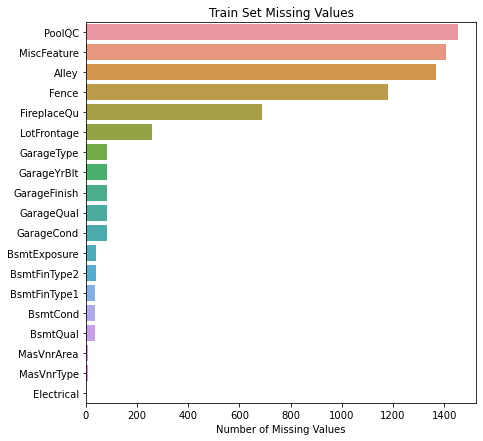

In [6]:
plt.rcParams["figure.figsize"] = (7,7)
sns.barplot(x=na_counts_train,y=na_counts_train.index, orient='h').set_title('Train Set Missing Values')
plt.xlabel('Number of Missing Values')

In [8]:
na_counts_test = test.isnull().sum()
na_counts_test = na_counts_test[na_counts_test != 0]
na_counts_test = na_counts_test.sort_values(ascending=False)

Text(0.5, 0, 'Number of Missing Values')

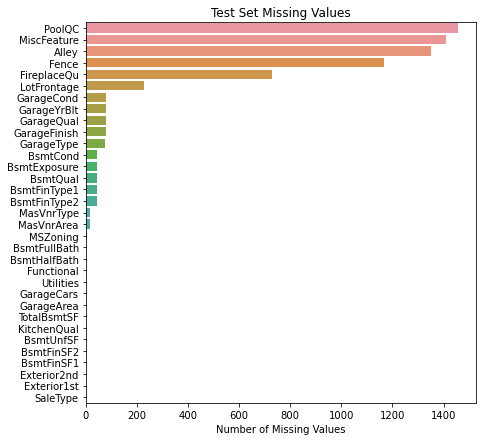

In [9]:
plt.rcParams["figure.figsize"] = (7,7)
sns.barplot(x=na_counts_test,y=na_counts_test.index, orient='h').set_title('Test Set Missing Values')
plt.xlabel('Number of Missing Values')

In [7]:
class DataCleaner:
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna(0)
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna(0)
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna(0)
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna(0)
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna(0)
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna(0)
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna(0)        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna(0)
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna(0)        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna(0)
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna(0)
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna(0)
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna(0)
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna(0)

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')
        
        
    def cleanMasVnrType(self):
        #self.imputeColumn('MasVnrType')
        self.train.loc[:,'MasVnrType'] = self.train['MasVnrType'].fillna('No_MasVnr')
        self.test.loc[:,'MasVnrType'] = self.test['MasVnrType'].fillna('No_MasVnr')

        
    
    def cleanMasVnrArea(self):
        #self.imputeColumn('MasVnrArea')
        self.train.loc[:,'MasVnrArea'] = self.train['MasVnrArea'].fillna(0)
        self.test.loc[:,'MasVnrArea'] = self.test['MasVnrArea'].fillna(0)
        
        
    def cleanMSSubClass(self):
        self.train.loc[:,'MSSubClass'] = self.train['MSSubClass'].astype('object')
        self.test.loc[:,'MSSubClass'] = self.test['MSSubClass'].astype('object')


    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify([colName])
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            for col in notCols:
                cat_cols.remove(col)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self, ordCols):
        
        for col in ordCols:
            self.train[col] = self.train[col].astype(str)
            self.test[col] = self.test[col].astype(str)

        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [8]:
cleaned = DataCleaner(train, test)
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()
cleaned.cleanMSSubClass()
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 18   5   1 216]]
0.9
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  3   1   0 219   9]
 [  3   0   1   7  37]]
0.9143835616438356
0.9364126171179089
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1]
 [ 0  0  0 18  0  0  0  0  0  0  0]
 [ 0  1  1  1 30  0  0  0  0  0  3]
 [ 1  0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  2  0 10  0  0  1  0]
 [ 0  0  0  0  0  1  0  2  0  1  0]
 [ 0  0  0  0  1  1  0  0 85  0  1]
 [ 3  0  1  0  0  1  1  2  0 32  2]
 [ 0  0  0  0  0  0  0  0  0  0  1]]
0.8879668049792531
0.9317100985205374
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 

# Feature Engineering

In [9]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x==0 else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x==0 else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x==0 else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x==0 else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
    
def addHasMasVnr(data):
    data['hasMasVnr'] = data['MasVnrType'].apply(lambda x: 0 if x=='No_MasVnr' else 1)

    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    
    
def addTotalSF(data):
    data['TotalSF'] = data['TotalIndoorSF'] + data['TotalOutdoorSF'] + data['GarageArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
def addHasBeenRemodeled(data):
    data['hasBeenRemodeled'] = data.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] else 1, axis=1)


    

In [10]:
addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addHasMasVnr(cleaned.train)
addHasMasVnr(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)

addTotalSF(cleaned.train)
addTotalSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)


addHasBeenRemodeled(cleaned.train)
addHasBeenRemodeled(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)



In [11]:
def plotIndicators(data):
    f, axes = plt.subplots(3,3, figsize=(10,10))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature', 'MasVnr', 'BeenRemodeled']
    rowIdx = 0
    colIdx = 0
    for idx, col in enumerate(cols):
        if colIdx > 2:
            rowIdx = rowIdx + 1
            colIdx = 0
        
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[rowIdx,colIdx])
        colIdx += 1
    f.tight_layout()

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

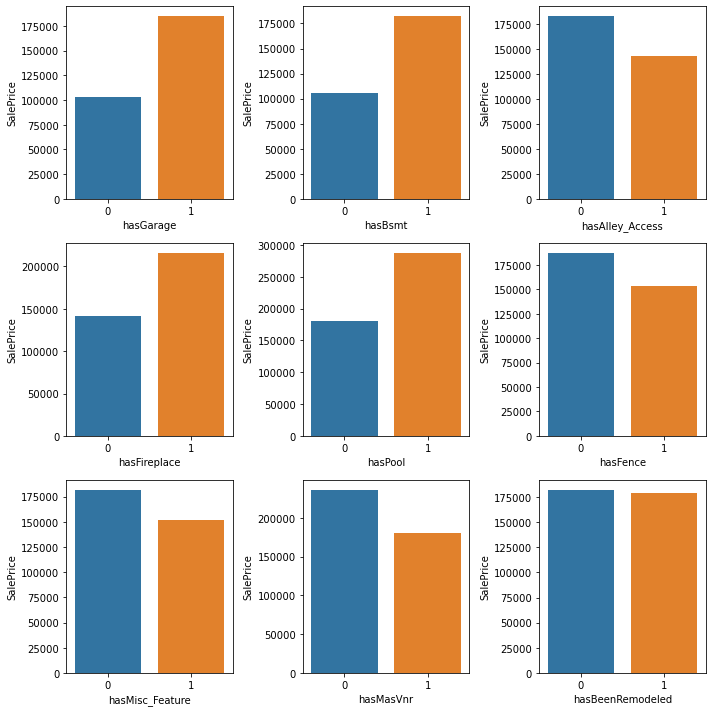

In [12]:
plotIndicators(cleaned.train)


# Dummify and Ordinal Encode Columns

In [13]:
mapping = {'Po': 1, 'Fa': 2, 'TA' : 3, 'Gd' : 4, 'Ex': 5}
cleaned.train = cleaned.train.replace({'KitchenQual': mapping, 'FireplaceQu': mapping, 'GarageQual': mapping, 
                                       'GarageCond': mapping, 'PoolQC': mapping, 'HeatingQC': mapping, 
                                       'BsmtQual': mapping, 'BsmtCond': mapping,'ExterQual': mapping, 'ExterCond': mapping})

cleaned.test = cleaned.test.replace({'KitchenQual': mapping, 'FireplaceQu': mapping, 'GarageQual': mapping, 
                                     'GarageCond': mapping,'PoolQC': mapping, 'HeatingQC': mapping, 'BsmtQual': mapping, 
                                     'BsmtCond': mapping, 'ExterQual': mapping, 'ExterCond': mapping})



In [14]:
ordCols = cleaned.train.columns[cleaned.train.dtypes == 'object']

# ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
#             'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold','BsmtExposure',
#            'BsmtFinType1', 'BsmtFinType2','Fence','LandSlope','GarageFinish']

In [15]:
cleaned.ordinalEncode(ordCols)

In [16]:
#trained, tested = cleaned.dummify(ordCols)

In [17]:
#cleaned.train.to_csv('train_filled_na_ord.csv')

In [18]:
#cleaned.test.to_csv('test_filled_na_ord.csv')

In [19]:
#trained.to_csv('train_filled_na.csv')

In [20]:
#tested.to_csv('test_filled_na.csv')

# Predictions on Test Set

In [ ]:
# tested_scaled = scaler.transform(tested)
# tested_scaled = pd.DataFrame(tested_scaled, columns = tested.columns)

# gbr_predictions = gridGbr.predict(tested)
# ridge_predictions = gridRidge.predict(tested_scaled[col_subset])
# lasso_predictions = gridLasso.predict(tested_scaled)
# svr_predictions = gridSVR.predict(tested_scaled)

# gbr_predictions = pd.Series(np.exp(np.array(gbr_predictions)))
# ridge_predictions = pd.Series(np.exp(np.array(ridge_predictions)))
# lasso_predictions = pd.Series(np.exp(np.array(lasso_predictions)))
# svr_predictions = pd.Series(np.exp(np.array(svr_predictions)))

# results = pd.concat([tested.reset_index()['Id'], pd.concat([gbr_predictions, ridge_predictions, lasso_predictions, svr_predictions], axis=1)],axis=1)

# final_pred_log_avg = np.exp((np.log(results[0]) + np.log(results[1]) + np.log(results[2]) + np.log(results[3]))/4)
# final_pred_log_avg = pd.DataFrame(final_pred_log_avg, columns=['SalePrice'])
# final_pred_avg = (results[0] + results[1] + results[2] + results[3])/4
# final_pred_avg = pd.DataFrame(final_pred_avg, columns=['SalePrice'])

# results = pd.concat([results, final_pred_log_avg],axis=1)

# Stacking Model

In [ ]:
# level0 = []
# level0.append(('gbr',gridGbr))
# level0.append(('ridge',gridRidge))
# level0.append(('lasso',gridLasso))
# level0.append(('svr',gridSVR))
# level1 = Ridge()
# model = StackingRegressor(estimators=level0, final_estimator=level1)

In [ ]:
# params = {}
# gridStacking = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
# gridStacking.fit(X_Scaled, y)
# print(gridStacking.cv_results_)
# print(gridStacking.best_params_)
# print(gridStacking.best_score_)

In [ ]:
# stacking_predictions = pd.DataFrame(gridStacking.predict(tested_scaled), columns=['SalePrice'])
# results_stacking = pd.concat([tested['Id'], stacking_predictions], axis=1)

# Submission

In [ ]:
#results

In [ ]:
#results[['Id','SalePrice']].to_csv('submission10.csv', index=False)

In [ ]:
#results_stacking

In [ ]:
#results_stacking[['Id','SalePrice']].to_csv('submission10.csv', index=False)